# Problem Statement¶
    Predict the sales price for each house || For each Id in the test set, you must predict the value of the SalePrice variable.

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Reading Datasets

In [2]:
import pandas as pd
import os
os.chdir("/Users/Arnav/Desktop/vb classes/PROJECTS/P1 (HOUSE PREDICTION)/")
train=pd.read_csv("training_set.csv")
test= pd.read_csv("testing_set.csv")

Replacing the NA values (NA != null values)

In [3]:
train["Alley"].fillna(value="noAcess", inplace=True)
train["BsmtQual"].fillna(value="noBasement", inplace=True)
train["BsmtCond"].fillna(value="noBasement", inplace=True)
train["BsmtExposure"].fillna(value="noBasement", inplace=True)
train["BsmtFinType1"].fillna(value="noBasement", inplace=True)
train["BsmtFinType2"].fillna(value="noBasement", inplace=True)
train["FireplaceQu"].fillna(value="noFireplace", inplace=True)
train["GarageType"].fillna(value="noGarage", inplace=True)
train["GarageFinish"].fillna(value="noGarage", inplace=True)
train["GarageQual"].fillna(value="noGarage", inplace=True)
train["GarageCond"].fillna(value="noGarage", inplace=True)
train["PoolQC"].fillna(value="noPool", inplace=True)
train["Fence"].fillna(value="noFence", inplace=True)
train["MiscFeature"].fillna(value="None", inplace=True)

In [4]:
test["Alley"].fillna(value="noAcess", inplace=True)
test["BsmtQual"].fillna(value="noBasement", inplace=True)
test["BsmtCond"].fillna(value="noBasement", inplace=True)
test["BsmtExposure"].fillna(value="noBasement", inplace=True)
test["BsmtFinType1"].fillna(value="noBasement", inplace=True)
test["BsmtFinType2"].fillna(value="noBasement", inplace=True)
test["FireplaceQu"].fillna(value="noFireplace", inplace=True)
test["GarageType"].fillna(value="noGarage", inplace=True)
test["GarageFinish"].fillna(value="noGarage", inplace=True)
test["GarageQual"].fillna(value="noGarage", inplace=True)
test["GarageCond"].fillna(value="noGarage", inplace=True)
test["PoolQC"].fillna(value="noPool", inplace=True)
test["Fence"].fillna(value="noFence", inplace=True)
test["MiscFeature"].fillna(value="None", inplace=True)

# Data Profiling

In [5]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,noAcess,Reg,Lvl,AllPub,...,0,noPool,noFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,noAcess,Reg,Lvl,AllPub,...,0,noPool,noFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,noAcess,IR1,Lvl,AllPub,...,0,noPool,noFence,None,0,9,2008,WD,Normal,223500


In [6]:
train.shape

(1460, 81)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,noAcess,Reg,Lvl,AllPub,...,120,0,noPool,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,noAcess,IR1,Lvl,AllPub,...,0,0,noPool,noFence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,noAcess,IR1,Lvl,AllPub,...,0,0,noPool,MnPrv,None,0,3,2010,WD,Normal


In [9]:
test.shape

(1459, 80)

In [10]:
# test.info()

# Missing value treatment

In [11]:
train.isna().sum().iloc[0:60]

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [12]:
train.isna().sum().iloc[60:81]

GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [13]:
cat = []
con = []

for i in train.columns:
    if(train[i].dtypes == "object"):
        cat.append(i)
        x = train[i].mode()[0]
        train[i] = train[i].fillna(x)
    else:
        con.append(i)
        x = train[i].mean()
        train[i] = train[i].fillna(x)

In [14]:
for i in test.columns:
    if(test[i].dtypes == "object"):
        cat.append(i)
        x = test[i].mode()[0]
        test[i] = test[i].fillna(x)
    else:
        con.append(i)
        x = test[i].mean()
        test[i] = test[i].fillna(x)

In [15]:
# train.isna().sum().iloc[0:60]
# train.isna().sum().iloc[60:81]

Missing values of train & test set have been treated!

# Initialize X & Y

In [16]:
X= train.drop(labels=["Id","SalePrice"],axis=1)
Y=train[["SalePrice"]]

# removing outliers

In [17]:
# con

In [18]:
cat = []
con = []

for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [19]:
Q = X[con].skew().sort_values()
cols_with_skew = Q[Q > 2].index

In [20]:
X[cols_with_skew].skew()

OpenPorchSF       2.364342
LotFrontage       2.384950
MasVnrArea        2.676412
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
MiscVal          24.476794
dtype: float64

In [21]:
#deal with continuous data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [22]:
# X1['MSSubClass']

In [23]:
out_index = []
for i in X1.columns:
    out_index.extend(list(X1[(X1[i]>3) | (X1[i]<-3)].index))
    
import numpy as np
outliers = np.unique(out_index)

X = X.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

In [24]:
X.shape

(1021, 79)

In [25]:
X1.shape

(1460, 36)

In [26]:
X.index= range(0,1021,1)
Y.index= range(0,1021,1)

# Exploratory Data Analysis

ANOVA test for categorical features

In [27]:
for i in cat:
    import pandas as pd
    from statsmodels.formula.api import ols
    rel = "SalePrice ~ " + str(i)
    model = ols(rel,train).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    print(rel,"--->  ",round(anova_results.iloc[0,4],4))

SalePrice ~ MSZoning --->   0.0
SalePrice ~ Street --->   0.117
SalePrice ~ Alley --->   0.0
SalePrice ~ LotShape --->   0.0
SalePrice ~ LandContour --->   0.0
SalePrice ~ Utilities --->   0.5847
SalePrice ~ LotConfig --->   0.0
SalePrice ~ LandSlope --->   0.1414
SalePrice ~ Neighborhood --->   0.0
SalePrice ~ Condition1 --->   0.0
SalePrice ~ Condition2 --->   0.0434
SalePrice ~ BldgType --->   0.0
SalePrice ~ HouseStyle --->   0.0
SalePrice ~ RoofStyle --->   0.0
SalePrice ~ RoofMatl --->   0.0
SalePrice ~ Exterior1st --->   0.0
SalePrice ~ Exterior2nd --->   0.0
SalePrice ~ MasVnrType --->   0.0
SalePrice ~ ExterQual --->   0.0
SalePrice ~ ExterCond --->   0.0
SalePrice ~ Foundation --->   0.0
SalePrice ~ BsmtQual --->   0.0
SalePrice ~ BsmtCond --->   0.0
SalePrice ~ BsmtExposure --->   0.0
SalePrice ~ BsmtFinType1 --->   0.0
SalePrice ~ BsmtFinType2 --->   0.0
SalePrice ~ Heating --->   0.0008
SalePrice ~ HeatingQC --->   0.0
SalePrice ~ CentralAir --->   0.0
SalePrice ~ Electric

SalePrice ~ Street - 0.117 || SalePrice ~ Utilities - 0.5847 || SalePrice ~ LandSlope - 0.1414

In [28]:
cat.remove("Street")
cat.remove("Utilities")
cat.remove("LandSlope")

Checking for highest correlation

In [29]:
train.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [30]:
train.corr()["SalePrice"].sort_values().index[0:13]

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea'],
      dtype='object')

In [31]:
# con

In [32]:
u = ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea']

for i in u:
    con.remove(i)

# Preprocessing

In [33]:
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])

Xnew = X1.join(X2)

In [34]:
Xnew.shape

(1021, 255)

In [35]:
Y.shape

(1021, 1)

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# MODEL 1- OLS BACKWARD ELIMINATION MODEL

# MODEL-1

In [37]:
from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     52.02
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          6.08e-292
Time:                        15:59:22   Log-Likelihood:                -9054.5
No. Observations:                 816   AIC:                         1.851e+04
Df Residuals:                     616   BIC:                         1.945e+04
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.333e+04   2178.289      6.117      0.000    9047.767    1.76e+04
LotFrontage              -266.4234   1146.443     -0.232      0.816   -2517.834    1984.987
LotArea                  5142.1528   1239.017      4.150      0.000    2708.943    7575.363
OverallQual              8225.7712   1600.579      5.139      0.000    5082.518    1.14e+04
YearBuilt                6684.8539   2824.732      2.367      0.018    1137.582    1.22e+04
YearRemodAdd             5781.0515   1373.400      4.209      0.000    3083.937    8478.166
MasVnrArea               -861.0929   1280.920     -0.672      0.502   -3376.593    1654.407
BsmtFinSF1               -464.0527   8501.900     -0.055      0.956   -1.72e+04    1.62e+04
BsmtUnfSF               -7112.4247   8957.034     -0.794      0.427   -2.47e+04    1.05e+04
TotalBsmtSF              1.422e+04   7908.073      1.799      0.073   -1306.003    2.98e+04
1stFlrSF                 7202.5910   4.76e+04      0.151      0.880   -8.63e+04    1.01e+05
2ndFlrSF                 1.771e+04   5.82e+04      0.304      0.761   -9.67e+04    1.32e+05
GrLivArea                9592.0690   6.22e+04      0.154      0.878   -1.13e+05    1.32e+05
BsmtFullBath             -278.2838   1143.314     -0.243      0.808   -2523.549    1966.982
FullBath                 -583.2270   1492.683     -0.391      0.696   -3514.591    2348.137
HalfBath                  251.2975   1257.040      0.200      0.842   -2217.306    2719.901
BedroomAbvGr            -1100.1183   1255.045     -0.877      0.381   -3564.805    1364.568
TotRmsAbvGrd              426.2810   1655.399      0.258      0.797   -2824.629    3677.191
Fireplaces               -418.4423   2049.280     -0.204      0.838   -4442.865    3605.981
GarageYrBlt             -2394.4321   1933.744     -1.238      0.216   -6191.961    1403.097
GarageCars               2667.5872   1911.611      1.395      0.163   -1086.477    6421.651
GarageArea               4431.6804   1858.717      2.384      0.017     781.489    8081.871
WoodDeckSF               3440.2774    813.520      4.229      0.000    1842.669    5037.886
OpenPorchSF              2182.2625    862.036      2.532      0.012     489.376    3875.149
ScreenPorch              1094.1591    723.836      1.512      0.131    -327.326    2515.644
MSZoning_C (all)        -2.305e+04   1.02e+04     -2.251      0.025   -4.32e+04   -2940.858
MSZoning_FV              2.347e+04   6684.528      3.511      0.000    1.03e+04    3.66e+04
MSZoning_RH             -1383.8499   8738.917     -0.158      0.874   -1.85e+04    1.58e+04
MSZoning_RL              6009.6136   4114.647      1.461      0.145   -2070.823    1.41e+04
MSZoning_RM              8278.5218   4796.828      1.726      0.085   -1141.596    1.77e+04
Alley_Grvl               6168.4584   4127.275  

In [38]:
round(model.rsquared_adj,4)

0.9257

In [39]:
model.pvalues.sort_values()#highest pvalue will be the last one

Neighborhood_StoneBr    9.402618e-12
BsmtExposure_Gd         1.650118e-09
PoolQC_noPool           1.690809e-09
const                   1.690809e-09
OverallQual             3.708411e-07
                            ...     
BsmtFinType2_Unf        9.796363e-01
Exterior1st_WdShing     9.809915e-01
Foundation_PConc        9.892537e-01
Neighborhood_SawyerW    9.984272e-01
GarageQual_Po                    NaN
Length: 256, dtype: float64

In [40]:
model.pvalues.sort_values().index

Index(['Neighborhood_StoneBr', 'BsmtExposure_Gd', 'PoolQC_noPool', 'const',
       'OverallQual', 'ExterCond_TA', 'BsmtFinType1_GLQ', 'KitchenQual_Ex',
       'WoodDeckSF', 'YearRemodAdd',
       ...
       'BsmtFinSF1', 'BldgType_Twnhs', 'Foundation_Slab', 'SaleType_Oth',
       'BsmtFinType1_BLQ', 'BsmtFinType2_Unf', 'Exterior1st_WdShing',
       'Foundation_PConc', 'Neighborhood_SawyerW', 'GarageQual_Po'],
      dtype='object', length=256)

# MODEL-2

In [41]:
model.pvalues.sort_values().index[-1]

'GarageQual_Po'

In [42]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9257

# MODEL-3

In [43]:
model.pvalues.sort_values().index[-1]

'Neighborhood_SawyerW'

In [44]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9257

# MODEL-4

In [45]:
model.pvalues.sort_values().index[-1]

'Foundation_PConc'

In [46]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9257

# MODEL-5

In [47]:
model.pvalues.sort_values().index[-1]

'Exterior1st_WdShing'

In [48]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9257

# MODEL-6

In [49]:
model.pvalues.sort_values().index[-1]

'Condition2_RRNn'

In [50]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9257

# MODEL-7

In [51]:
model.pvalues.sort_values().index[-1]

'Foundation_Wood'

In [52]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9257

# MODEL-8

In [53]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_Unf'

In [54]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9257

# MODEL-9

In [55]:
model.pvalues.sort_values().index[-1]

'BsmtFinType1_BLQ'

In [56]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9257

# MODEL-10

In [57]:
model.pvalues.sort_values().index[-1]

'SaleType_Oth'

In [58]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9257

# MODEL-11

In [59]:
model.pvalues.sort_values().index[-1]

'Foundation_Slab'

In [60]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9258

# MODEL-12

In [61]:
model.pvalues.sort_values().index[-1]

'BsmtFinSF1'

In [62]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9259

# MODEL-13

In [63]:
model.pvalues.sort_values().index[-1]

'BldgType_Twnhs'

In [64]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9259

# MODEL-14

In [65]:
model.pvalues.sort_values().index[-1]

'Condition1_RRNe'

In [66]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9259

# MODEL-15

In [67]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_Plywood'

In [68]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9259

# MODEL-16

In [69]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_Wd Shng'

In [70]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9261

# MODEL-17

In [71]:
model.pvalues.sort_values().index[-1]

'Exterior1st_MetalSd'

In [72]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9262

# MODEL-18

In [73]:
model.pvalues.sort_values().index[-1]

'GarageCond_TA'

In [74]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9262

# MODEL-19

In [75]:
model.pvalues.sort_values().index[-1]

'Condition2_Norm'

In [76]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9262

# MODEL-20

In [77]:
model.pvalues.sort_values().index[-1]

'Functional_Maj2'

In [78]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9262

# MODEL-21

In [79]:
model.pvalues.sort_values().index[-1]

'Functional_Min1'

In [80]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9263

# MODEL-22

In [81]:
model.pvalues.sort_values().index[-1]

'Heating_GasW'

In [82]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9263

# MODEL-23

In [83]:
model.pvalues.sort_values().index[-1]

'BsmtFinType1_Rec'

In [84]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9264

# MODEL-24

In [85]:
model.pvalues.sort_values().index[-1]

'SaleType_WD'

In [86]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9265

# MODEL-25

In [87]:
model.pvalues.sort_values().index[-1]

'LotConfig_FR2'

In [88]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9265

# MODEL-26

In [89]:
model.pvalues.sort_values().index[-1]

'Electrical_FuseP'

In [90]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9265

# MODEL-27

In [91]:
model.pvalues.sort_values().index[-1]

'1stFlrSF'

In [92]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9266

# MODEL-28

In [93]:
model.pvalues.sort_values().index[-1]

'Heating_Floor'

In [94]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9266

# MODEL-29

In [95]:
model.pvalues.sort_values().index[-1]

'HouseStyle_1.5Fin'

In [96]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9266

# MODEL-30

In [97]:
model.pvalues.sort_values().index[-1]

'MSZoning_RH'

In [98]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9266

# MODEL-31

In [99]:
model.pvalues.sort_values().index[-1]

'RoofStyle_Gable'

In [100]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9266

# MODEL-32

In [101]:
model.pvalues.sort_values().index[-1]

'KitchenQual_TA'

In [102]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9266

# MODEL-33

In [103]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_Brk Cmn'

In [104]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9268

# MODEL-34

In [105]:
model.pvalues.sort_values().index[-1]

'Neighborhood_BrkSide'

In [106]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9269

# MODEL-35

In [107]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Blueste'

In [108]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.927

# MODEL-36

In [109]:
model.pvalues.sort_values().index[-1]

'BsmtFullBath'

In [110]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9271

# MODEL-37

In [111]:
model.pvalues.sort_values().index[-1]

'PavedDrive_P'

In [112]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9271

# MODEL-38

In [113]:
model.pvalues.sort_values().index[-1]

'HouseStyle_SLvl'

In [114]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9272

# MODEL-39

In [115]:
model.pvalues.sort_values().index[-1]

'RoofMatl_WdShake'

In [116]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9272

# MODEL-40

In [117]:
model.pvalues.sort_values().index[-1]

'RoofMatl_Tar&Grv'

In [118]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9272

# MODEL-41

In [119]:
model.pvalues.sort_values().index[-1]

'RoofStyle_Flat'

In [120]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9273

# MODEL-42

In [121]:
model.pvalues.sort_values().index[-1]

'HeatingQC_Fa'

In [122]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9273

# MODEL-43

In [123]:
model.pvalues.sort_values().index[-1]

'HeatingQC_Gd'

In [124]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9274

# MODEL-44

In [125]:
model.pvalues.sort_values().index[-1]

'LotFrontage'

In [126]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9275

# MODEL-45

In [127]:
model.pvalues.sort_values().index[-1]

'HalfBath'

In [128]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9276

# MODEL-46

In [129]:
model.pvalues.sort_values().index[-1]

'Foundation_CBlock'

In [130]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9278

# MODEL-47

In [131]:
model.pvalues.sort_values().index[-1]

'MasVnrType_BrkCmn'

In [132]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9278

# MODEL-48

In [133]:
model.pvalues.sort_values().index[-1]

'Fireplaces'

In [134]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9279

# MODEL-49

In [135]:
model.pvalues.sort_values().index[-1]

'MasVnrType_None'

In [136]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.928

# MODEL-50

In [137]:
model.pvalues.sort_values().index[-1]

'SaleCondition_Family'

In [138]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.928

# MODEL-51

In [139]:
model.pvalues.sort_values().index[-1]

'TotRmsAbvGrd'

In [140]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9281

# MODEL-52

In [141]:
model.pvalues.sort_values().index[-1]

'KitchenQual_Fa'

In [142]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9282

# MODEL-53

In [143]:
model.pvalues.sort_values().index[-1]

'Condition2_Feedr'

In [144]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9283

# MODEL-54

In [145]:
model.pvalues.sort_values().index[-1]

'Heating_Grav'

In [146]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9284

# MODEL-55

In [147]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_ImStucc'

In [148]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9285

# MODEL-56

In [149]:
model.pvalues.sort_values().index[-1]

'RoofStyle_Mansard'

In [150]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9286

# MODEL-57

In [151]:
model.pvalues.sort_values().index[-1]

'GarageCond_Gd'

In [152]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9287

# MODEL-58

In [153]:
model.pvalues.sort_values().index[-1]

'FireplaceQu_noFireplace'

In [154]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9287

# MODEL-59

In [155]:
model.pvalues.sort_values().index[-1]

'RoofMatl_WdShngl'

In [156]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9288

# MODEL-60

In [157]:
model.pvalues.sort_values().index[-1]

'BsmtCond_Fa'

In [158]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9288

# MODEL-61

In [159]:
model.pvalues.sort_values().index[-1]

'RoofStyle_Gambrel'

In [160]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9289

# MODEL-62

In [161]:
model.pvalues.sort_values().index[-1]

'BldgType_Duplex'

In [162]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.929

# MODEL-63

In [163]:
model.pvalues.sort_values().index[-1]

'GarageType_BuiltIn'

In [164]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.929

# MODEL-64

In [165]:
model.pvalues.sort_values().index[-1]

'GarageType_Detchd'

In [166]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9291

# MODEL-65

In [167]:
model.pvalues.sort_values().index[-1]

'GarageType_Basment'

In [168]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9292

# MODEL-66

In [169]:
model.pvalues.sort_values().index[-1]

'BsmtExposure_Av'

In [170]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9292

# MODEL-67

In [171]:
model.pvalues.sort_values().index[-1]

'Heating_GasA'

In [172]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9292

# MODEL-68

In [173]:
model.pvalues.sort_values().index[-1]

'SaleType_ConLw'

In [174]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9293

# MODEL-69

In [175]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_ALQ'

In [176]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9294

# MODEL-70

In [177]:
model.pvalues.sort_values().index[-1]

'BsmtFinType1_LwQ'

In [178]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9295

# MODEL-71

In [179]:
model.pvalues.sort_values().index[-1]

'BldgType_TwnhsE'

In [180]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9296

# MODEL-72

In [181]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_CBlock'

In [182]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9296

# MODEL-73

In [183]:
model.pvalues.sort_values().index[-1]

'Exterior1st_CBlock'

In [184]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9297

# MODEL-74

In [185]:
model.pvalues.sort_values().index[-1]

'HouseStyle_SFoyer'

In [186]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9298

# MODEL-75

In [187]:
model.pvalues.sort_values().index[-1]

'FullBath'

In [188]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9299

# MODEL-76

In [189]:
model.pvalues.sort_values().index[-1]

'SaleType_ConLI'

In [190]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9299

# MODEL-77

In [191]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_BrkFace'

In [192]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.93

# MODEL-78

In [193]:
model.pvalues.sort_values().index[-1]

'Condition1_RRAn'

In [194]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.93

# MODEL-79

In [195]:
model.pvalues.sort_values().index[-1]

'Condition1_Feedr'

In [196]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9301

# MODEL-80

In [197]:
model.pvalues.sort_values().index[-1]

'Fence_MnWw'

In [198]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9301

# MODEL-81

In [199]:
model.pvalues.sort_values().index[-1]

'Alley_Pave'

In [200]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9301

# MODEL-82

In [201]:
model.pvalues.sort_values().index[-1]

'Alley_noAcess'

In [202]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9302

# MODEL-83

In [203]:
model.pvalues.sort_values().index[-1]

'Alley_Grvl'

In [204]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9303

# MODEL-84

In [205]:
model.pvalues.sort_values().index[-1]

'GarageCond_Ex'

In [206]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9303

# MODEL-85

In [207]:
model.pvalues.sort_values().index[-1]

'GarageQual_TA'

In [208]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9303

# MODEL-86

In [209]:
model.pvalues.sort_values().index[-1]

'GarageQual_Ex'

In [210]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9304

# MODEL-87

In [211]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Veenker'

In [212]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9305

# MODEL-88

In [213]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_AsbShng'

In [214]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9305

# MODEL-89

In [215]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_Stone'

In [216]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9306

# MODEL-90

In [217]:
model.pvalues.sort_values().index[-1]

'ExterQual_Gd'

In [218]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9306

# MODEL-91

In [219]:
model.pvalues.sort_values().index[-1]

'ExterQual_TA'

In [220]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9307

# MODEL-92

In [221]:
model.pvalues.sort_values().index[-1]

'SaleType_Con'

In [222]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9308

# MODEL-93

In [223]:
model.pvalues.sort_values().index[-1]

'Condition1_RRNn'

In [224]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9308

# MODEL-94

In [225]:
model.pvalues.sort_values().index[-1]

'LotConfig_FR3'

In [226]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9309

# MODEL-95

In [227]:
model.pvalues.sort_values().index[-1]

'SaleCondition_Abnorml'

In [228]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.931

# MODEL-96

In [229]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_Rec'

In [230]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.931

# MODEL-97

In [231]:
model.pvalues.sort_values().index[-1]

'Exterior1st_Stucco'

In [232]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9311

# MODEL-98

In [233]:
model.pvalues.sort_values().index[-1]

'MSZoning_RL'

In [234]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9312

# MODEL-99

In [235]:
model.pvalues.sort_values().index[-1]

'MSZoning_RM'

In [236]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9312

# MODEL-100

In [237]:
model.pvalues.sort_values().index[-1]

'Neighborhood_IDOTRR'

In [238]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9313

# MODEL-101

In [239]:
model.pvalues.sort_values().index[-1]

'SaleType_ConLD'

In [240]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9314

# MODEL-102

In [241]:
model.pvalues.sort_values().index[-1]

'BldgType_2fmCon'

In [242]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9314

# MODEL-103

In [243]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_LwQ'

In [244]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9315

# MODEL-104

In [245]:
model.pvalues.sort_values().index[-1]

'BsmtFinType1_Unf'

In [246]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9315

# MODEL-105

In [247]:
model.pvalues.sort_values().index[-1]

'GarageCond_Po'

In [248]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9316

# MODEL-106

In [249]:
model.pvalues.sort_values().index[-1]

'PavedDrive_Y'

In [250]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9317

# MODEL-107

In [251]:
model.pvalues.sort_values().index[-1]

'PavedDrive_N'

In [252]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9317

# MODEL-108

In [253]:
model.pvalues.sort_values().index[-1]

'LandContour_Low'

In [254]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9317

# MODEL-110

In [255]:
model.pvalues.sort_values().index[-1]

'Exterior1st_CemntBd'

In [256]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9318

# MODEL-111

In [257]:
model.pvalues.sort_values().index[-1]

'Fence_GdPrv'

In [258]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9318

# MODEL-112

In [259]:
model.pvalues.sort_values().index[-1]

'Fence_GdWo'

In [260]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9319

# MODEL-113

In [261]:
model.pvalues.sort_values().index[-1]

'Fence_MnPrv'

In [262]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9319

# MODEL-114

In [263]:
model.pvalues.sort_values().index[-1]

'Fence_noFence'

In [264]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.932

# MODEL-115

In [265]:
model.pvalues.sort_values().index[-1]

'Exterior1st_ImStucc'

In [266]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9321

# MODEL-116

In [267]:
model.pvalues.sort_values().index[-1]

'Condition1_PosA'

In [268]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9321

# MODEL-117

In [269]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_HdBoard'

In [270]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9322

# MODEL-118

In [271]:
model.pvalues.sort_values().index[-1]

'LotShape_IR3'

In [272]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9322

# MODEL-119

In [273]:
model.pvalues.sort_values().index[-1]

'BedroomAbvGr'

In [274]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9322

# MODEL-120

In [275]:
model.pvalues.sort_values().index[-1]

'Condition1_Artery'

In [276]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9322

# MODEL-121

In [277]:
model.pvalues.sort_values().index[-1]

'SaleType_COD'

In [278]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9322

# MODEL-122

In [279]:
model.pvalues.sort_values().index[-1]

'Exterior2nd_Other'

In [280]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-123

In [281]:
model.pvalues.sort_values().index[-1]

'HeatingQC_TA'

In [282]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-124

In [283]:
model.pvalues.sort_values().index[-1]

'MasVnrArea'

In [284]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-125

In [285]:
model.pvalues.sort_values().index[-1]

'MasVnrType_BrkFace'

In [286]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-126

In [287]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_BLQ'

In [288]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9324

# MODEL-127

In [289]:
model.pvalues.sort_values().index[-1]

'GarageCond_Fa'

In [290]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9324

# MODEL-128

In [291]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Somerst'

In [292]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-129

In [293]:
model.pvalues.sort_values().index[-1]

'SaleType_New'

In [294]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-130

In [295]:
model.pvalues.sort_values().index[-1]

'Exterior1st_AsbShng'

In [296]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-131

In [297]:
model.pvalues.sort_values().index[-1]

'BsmtCond_Gd'

In [298]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-132

In [299]:
model.pvalues.sort_values().index[-1]

'BsmtQual_noBasement'

In [300]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-133

In [301]:
model.pvalues.sort_values().index[-1]

'BsmtExposure_noBasement'

In [302]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-134

In [303]:
model.pvalues.sort_values().index[-1]

'BsmtCond_noBasement'

In [304]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-135

In [305]:
model.pvalues.sort_values().index[-1]

'BsmtFinType2_noBasement'

In [306]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-136

In [307]:
model.pvalues.sort_values().index[-1]

'BsmtFinType1_noBasement'

In [308]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9323

# MODEL-137

In [309]:
model.pvalues.sort_values().index[-1]

'BsmtQual_Fa'

In [310]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9324

# MODEL-138

In [311]:
model.pvalues.sort_values().index[-1]

'FireplaceQu_TA'

In [312]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9324

# MODEL-139

In [313]:
model.pvalues.sort_values().index[-1]

'FireplaceQu_Ex'

In [314]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9324

# MODEL-140

In [315]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Gilbert'

In [316]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9324

# MODEL-141

In [317]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Sawyer'

In [318]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9325

# MODEL-142

In [319]:
model.pvalues.sort_values().index[-1]

'LotShape_IR2'

In [320]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9325

# MODEL-143

In [321]:
model.pvalues.sort_values().index[-1]

'LotShape_Reg'

In [322]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9325

# MODEL-144

In [323]:
model.pvalues.sort_values().index[-1]

'LotShape_IR1'

In [324]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9326

# MODEL-145

In [325]:
model.pvalues.sort_values().index[-1]

'GarageType_Attchd'

In [326]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9326

# MODEL-146

In [327]:
model.pvalues.sort_values().index[-1]

'Foundation_Stone'

In [328]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9326

# MODEL-147

In [329]:
model.pvalues.sort_values().index[-1]

'Neighborhood_CollgCr'

In [330]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9325

# MODEL-148

In [331]:
model.pvalues.sort_values().index[-1]

'Neighborhood_Timber'

In [332]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9326

# MODEL-149

In [333]:
model.pvalues.sort_values().index[-1]

'Heating_Wall'

In [334]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9325

# MODEL-150

In [335]:
model.pvalues.sort_values().index[-1]

'Exterior1st_BrkComm'

In [336]:
columns_to_be_dropped =model.pvalues.sort_values().index[-1]
Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS, add_constant
xconst=add_constant(xtrain,has_constant="add")
ols= OLS(ytrain,xconst)
model=ols.fit()

round(model.rsquared_adj,4)

0.9325

# rsquare value decreases from here

# MODEL-151

In [337]:
# model.pvalues.sort_values().index[-1]

In [338]:
# columns_to_be_dropped =model.pvalues.sort_values().index[-1]
# Xnew= Xnew.drop(labels=columns_to_be_dropped,axis=1)

# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# from statsmodels.api import OLS, add_constant
# xconst=add_constant(xtrain)
# ols= OLS(ytrain,xconst)
# model=ols.fit()

# round(model.rsquared_adj,4)

In [339]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error,mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,pred_tr),2)
ts_err = round(mean_absolute_error(ytest,pred_ts),2)

In [340]:
print("The training error for the OLS Backward Elimination Model: ",tr_err )

The training error for the OLS Backward Elimination Model:  11355.44


In [341]:
print("The testing error for the OLS Backward Elimination Model: ",ts_err )

The testing error for the OLS Backward Elimination Model:  199147402727678.12


# Ridge & Lasso

In [342]:
tr= []
ts= []

In [343]:
w=[]
q=0.01
for i in range(0,1000,1):
    q=q+0.01
    q=round(q,2)
    w.append(q)

In [344]:
for i in w:
    from sklearn.linear_model import Ridge
    from sklearn.metrics import mean_absolute_error
    rr=Ridge(alpha=i)
    model=rr.fit(xtrain,ytrain)

    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)
    
    tr.append(tr_err)
    ts.append(ts_err)

#     print("=================",i,"================")
#     print("The training error(Ridge) is: ",training_error)
#     print("The testing error(Ridge) is: ",testing_error,"\n")

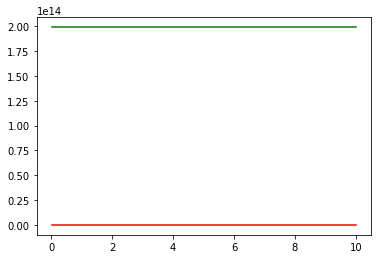

In [345]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")

In [346]:
    from sklearn.linear_model import Ridge
    rr=Ridge(alpha=10.01)
    model=rr.fit(xtrain,ytrain)

    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)
    
    tr.append(tr_err)
    ts.append(ts_err)

    print("=================","================")
    print("The training error(Ridge) is: ",training_error)
    print("The testing error(Ridge) is: ",testing_error,"\n")

================= ================
The training error(Ridge) is:  12055.24
The testing error(Ridge) is:  13310.43 



# difference between the training and testing error = 1,255.19

In [347]:
tr = []
ts = []

In [348]:
w=[]
q=0.01
for i in range(0,1000,1):
    q=q+0.01
    q=round(q,2)
    w.append(q)

In [349]:
for i in w:
    from sklearn.linear_model import Lasso
    ls=Lasso(alpha=i)
    model=ls.fit(xtrain,ytrain)
    from sklearn.metrics import mean_absolute_error
    
    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)
    
    tr.append(tr_err)
    ts.append(ts_err)

#     print("=================",i,"================")
#     print("The training error(Lasso) is: ",training_error)
#     print("The testing error(Lasso) is: ",testing_error,"\n")

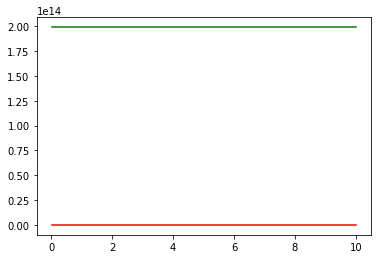

In [350]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")

In [351]:
    from sklearn.linear_model import Lasso
    ls=Lasso(alpha=10.01)
    model=ls.fit(xtrain,ytrain)
        
    pred_training= model.predict(xtrain)
    training_error= round(mean_absolute_error(ytrain,pred_training),2)

    pred_testing= model.predict(xtest)
    testing_error= round(mean_absolute_error(ytest,pred_testing),2)

    print("=================","================")
    print("The training error(Lasso) is: ",training_error)
    print("The testing error(Lasso) is: ",testing_error,"\n")

================= ================
The training error(Lasso) is:  11345.7
The testing error(Lasso) is:  13612.13 



# difference between the training and testing error = 2,266.43

# TEST SET

In [352]:
test.shape

(1459, 80)

In [353]:
cols_to_keep = xtrain.columns

In [354]:
cat = []
con = []
for i in test.columns:
    if(test[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [355]:
test1 = test[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch']]

In [356]:
Xtest1 = pd.DataFrame(ss.transform(test1),columns=test1.columns)

In [357]:
Xtest2 = pd.get_dummies(test[cat])

In [358]:
Xtest_new = Xtest1.join(Xtest2)

In [359]:
final_xtest = Xtest_new[cols_to_keep]

In [360]:
pred = model.predict(final_xtest)

In [361]:
FinalPredictionModel = test[["Id"]]
FinalPredictionModel['SalePrice']=pred

In [362]:
FinalPredictionModel.head(3)

,Id,SalePrice
0,1461,124684.494971
1,1462,176171.644176
2,1463,194466.364848


In [363]:
FinalPredictionModel.shape

(1459, 2)

In [364]:
# FinalPredictionModel.to_csv("C:/Users/Arnav/Desktop/vb classes/PROJECTS/P1 (HOUSE PREDICTION)/submission.csv")